# Tutorial 1 - MBP Biostatistics 2022

Welcome to the MBP biostatistics module in 2022-2023! This notebook will go over some basic ideas in python that will be useful for your homework assignments. This first block has some reference material before the questions we'll solve in groups in the tutorial. 

In [1]:
# This is a comment
# To run this block, use Shift+Enter

# Importing packages
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
# print words onto the console
print('Hello, world!')

Hello, world!


In [3]:
# variables
x = 'Hello, world!'
print(x)

Hello, world!


In [4]:
# printing numbers and words
p = 0.04
print(f"p = {p}") # or
print("p =", p) 

p = 0.04
p = 0.04


In [5]:
# lists and basic operations
!pip install numpy
import numpy as np

grades = [90, 97, 86, 84, 82, 90, 93]
avg = np.mean(grades)
std = np.std(grades)

print(sorted(grades))

print(f"Average = {round(avg, 2)}, Std.Dev = {round(std, 2)}")

Defaulting to user installation because normal site-packages is not writeable
[82, 84, 86, 90, 90, 93, 97]
Average = 88.86, Std.Dev = 4.85


In [6]:
# for loops
for i in range(5):
    print(i)
    
y = [i for i in range(5)]

print(y)

0
1
2
3
4
[0, 1, 2, 3, 4]


In [7]:
# if statements
if 1 < 2:
    print('True')
    
if not True:
    print('False')

True


In [8]:
# functions

def func(a, b):
    """
    Function that adds and b
    """
    
    return a + b

print(func(2, 3))

5


In [9]:
# load csv or tsv file
import pandas as pd
df = pd.read_csv('sample.tsv', sep='\t')

print(df["Some parameter"])
print(df["Other parameter"])
print(df["Last parameter"])

df.head()

0    CONST
Name: Some parameter, dtype: object
0    123456
Name: Other parameter, dtype: int64
0    12.45
Name: Last parameter, dtype: float64


Some parameter  Other parameter  Last parameter
0          CONST           123456           12.45

To write plain text in a jupyter notebook, use the 'Markdown' option for a code block. To make header blocks, use the # character. You can type LaTeX equations if you want, with equation structure such as

$$ a^2 + b^2 = c^2.$$

You can make italics and bold text using the * character: *this is italic text*, and **this is bold text**.

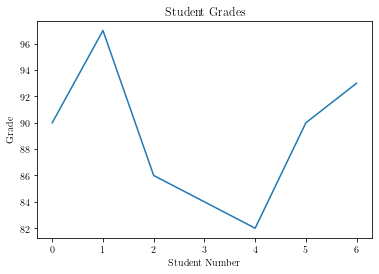

In [10]:
# plotting
import matplotlib.pyplot as plt

plt.figure()
plt.plot(grades)
plt.xlabel('Student Number')
plt.ylabel('Grade')
plt.title('Student Grades')
plt.show()

## Problem 1
Make a descriptive plot that accurately conveys the distribution of student grades on the exam. For this and all plots, please label your axes and add a descriptive title.

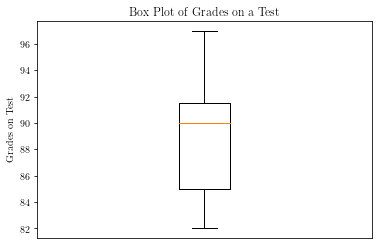

In [11]:
# plot a reasonable representation of the data with labelled axes
plt.figure()
plt.boxplot(grades)

plt.xticks([]) # clear ticks
plt.ylabel('Grades on Test')

plt.title('Box Plot of Grades on a Test')

plt.show()

## Problem 2
From the file `airtravel.csv`, plot the distribution of flights over the three years 1958, 1959, 1960. Note that these numbers are in units of 1000 passengers. 

In [12]:
at = pd.read_csv('airtravel.csv')
at.head()

Month  1958  1959  1960
0   JAN   340   360   417
1   FEB   318   342   391
2   MAR   362   406   419
3   APR   348   396   461
4   MAY   363   420   472

In [13]:
plt.figure()

plt.boxplot([at["1958"], at["1959"], at["1960"]])
plt.xticks([1, 2, 3], ['1958', '1959', '1960'])
plt.xlabel('Year')
plt.ylabel('1000 passengers')
plt.title('Flight Data Broken Down by Year')
plt.show()

## Problem 3
Plot the distribution of flights over the 12 months of the year. Given that we only have three data points for each month, an errorbar plot will work well using the mean and standard deviation of the data for each month.

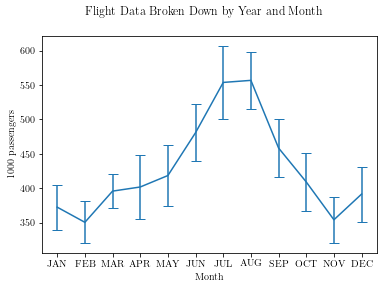

In [14]:
month_avg = []
month_std = []
for m in at["Month"]:
    month = at.loc[at["Month"] == m]
    data = [month["1958"], month["1959"], month["1960"]]
    month_avg.append(np.mean(data))
    month_std.append(np.std(data))

plt.figure()
plt.errorbar(x=list(range(12)), y=month_avg, yerr=month_std, capsize=5)
plt.xticks(list(range(12)), at["Month"])
plt.xlabel('Month')
plt.ylabel('1000 passengers')

plt.suptitle('Flight Data Broken Down by Year and Month')

plt.show()

## Bonus Problem
What is a good way to visualize the flight frequency over both month and year in the same plot?

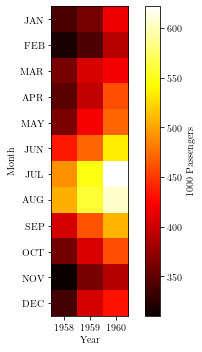

In [15]:
# Let's try a heatmap
x = np.zeros((3, 12))
for i, y in enumerate(at.keys().drop('Month')):
    for j in range(len(at[y])):
        x[i, j] = at[y][j]
        
plt.figure(figsize=(5, 5))
plt.imshow(x.T, cmap='hot')
plt.xlabel('Year')
plt.xticks([0, 1, 2], ['1958', '1959', '1960'])
plt.ylabel('Month')
plt.yticks(list(range(12)), at["Month"])
c = plt.colorbar()
c.set_label('1000 Passengers')
plt.tight_layout()
plt.show()